# Modeling

# 2.1 Time series forecasting. Explanation and reasons to apply

**Time series forecasting** help to predict the future values of demand based on previous known values, it is used when the dependend variable varies over time

There are 4 main components that define a Time series:
1. Trend: upward and downward movement of the demand over a period of time
2. Seasonality: seasonal variances of the data
3. Residuals: noise - random variations
4. Cyclicity: the behavior is repeated after an interval of time

Before starting to apply the model is important that the series is stationary, this means: \
    - the mean is constant \
    - the variance or standard deviation is constant \
    - auto covariance is independent of time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime

In [3]:
#Import the data we created in the first notebook
rides_per_hour = pd.read_csv('movements_grouped.csv')
rides_per_hour = rides_per_hour[['datetime', 'date', 'weekday', 'hour',  'time', 'month', 'is_holiday', 'rides']]
rides_per_hour

,datetime,date,weekday,hour,time,month,is_holiday,rides
0,2018-12-31 23:00:00,2018-12-31 00:00:00,Monday,23,23:00:00,12,0,176
1,2019-01-02 00:00:00,2019-01-02 00:00:00,Wednesday,0,00:00:00,1,0,52
2,2019-01-02 01:00:00,2019-01-02 00:00:00,Wednesday,1,01:00:00,1,0,29
3,2019-01-02 02:00:00,2019-01-02 00:00:00,Wednesday,2,02:00:00,1,0,32
4,2019-01-02 03:00:00,2019-01-02 00:00:00,Wednesday,3,03:00:00,1,0,23
...,...,...,...,...,...,...,...,...
20020,2021-01-06 19:00:00,2021-01-06 00:00:00,Wednesday,19,19:00:00,1,1,277
20021,2021-01-06 20:00:00,2021-01-06 00:00:00,Wednesday,20,20:00:00,1,1,219
20022,2021-01-06 21:00:00,2021-01-06 00:00:00,Wednesday,21,21:00:00,1,1,191
20023,2021-01-06 22:00:00,2021-01-06 00:00:00,Wednesday,22,22:00:00,1,1,212


In [4]:
rides_per_hour.set_index('datetime', inplace=True)

In [5]:
rides_per_hour

,date,weekday,hour,time,month,is_holiday,rides
datetime,,,,,,,
2018-12-31 23:00:00,2018-12-31 00:00:00,Monday,23,23:00:00,12,0,176
2019-01-02 00:00:00,2019-01-02 00:00:00,Wednesday,0,00:00:00,1,0,52
2019-01-02 01:00:00,2019-01-02 00:00:00,Wednesday,1,01:00:00,1,0,29
2019-01-02 02:00:00,2019-01-02 00:00:00,Wednesday,2,02:00:00,1,0,32
2019-01-02 03:00:00,2019-01-02 00:00:00,Wednesday,3,03:00:00,1,0,23
...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06 00:00:00,Wednesday,19,19:00:00,1,1,277
2021-01-06 20:00:00,2021-01-06 00:00:00,Wednesday,20,20:00:00,1,1,219
2021-01-06 21:00:00,2021-01-06 00:00:00,Wednesday,21,21:00:00,1,1,191


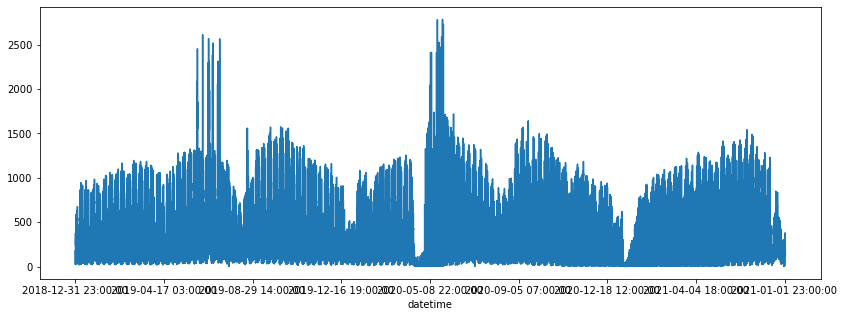

In [6]:
fig, ax = plt.subplots(figsize=(14, 5))

rides_per_hour['rides'].plot(ax=ax)
plt.show()

We want to made a model in order to predict the number of trips per hour and stations. We are going to use ML supervised models



# 2.2.  Preparing data for models 

Supervised learning problem,

Input variables that may affect to the demand:
- Date
- Day of week (weekday / holiday / weekend)
- Seasons (summer / winter)
- Weather (PENDIENTE)
- Lag feature (7 days ago): demand could be similar the same day of week

First we are going to consider all stations

## 2.2.1. Feature engineering

In [7]:
rides_per_hour['date'] = pd.to_datetime(rides_per_hour['date'])
rides_per_hour['day'] = rides_per_hour['date'].dt.day
rides_per_hour['year'] = rides_per_hour['date'].dt.year
rides_per_hour

,date,weekday,hour,time,month,is_holiday,rides,day,year
datetime,,,,,,,,,
2018-12-31 23:00:00,2018-12-31,Monday,23,23:00:00,12,0,176,31,2018
2019-01-02 00:00:00,2019-01-02,Wednesday,0,00:00:00,1,0,52,2,2019
2019-01-02 01:00:00,2019-01-02,Wednesday,1,01:00:00,1,0,29,2,2019
2019-01-02 02:00:00,2019-01-02,Wednesday,2,02:00:00,1,0,32,2,2019
2019-01-02 03:00:00,2019-01-02,Wednesday,3,03:00:00,1,0,23,2,2019
...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06,Wednesday,19,19:00:00,1,1,277,6,2021
2021-01-06 20:00:00,2021-01-06,Wednesday,20,20:00:00,1,1,219,6,2021
2021-01-06 21:00:00,2021-01-06,Wednesday,21,21:00:00,1,1,191,6,2021


In [9]:
def is_weekend(weekday):
    '''Giving a day as an input string returns True if day is in the weekend'''
    if weekday == 'Saturday' or weekday == "Sunday" or weekday == "saturday" or weekday == "sunday":
        return 1
    else:
        return 0

In [10]:
def season(month):
    '''Input: month (int) and returns the season'''
    if month >= 4 and month <=6:
        return 1
    elif month > 6 and month<=9:
        return 2
    elif month >9 and month <=12:
        return 3
    else:
        return 4
    
    

In [11]:
rides_per_hour['is_weekend'] = rides_per_hour['weekday'].apply(is_weekend)
rides_per_hour['season'] = rides_per_hour['month'].apply(season)

In [12]:
rides_per_hour

,date,weekday,hour,time,month,is_holiday,rides,day,year,is_weekend,season
datetime,,,,,,,,,,,
2018-12-31 23:00:00,2018-12-31,Monday,23,23:00:00,12,0,176,31,2018,0,3
2019-01-02 00:00:00,2019-01-02,Wednesday,0,00:00:00,1,0,52,2,2019,0,4
2019-01-02 01:00:00,2019-01-02,Wednesday,1,01:00:00,1,0,29,2,2019,0,4
2019-01-02 02:00:00,2019-01-02,Wednesday,2,02:00:00,1,0,32,2,2019,0,4
2019-01-02 03:00:00,2019-01-02,Wednesday,3,03:00:00,1,0,23,2,2019,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06,Wednesday,19,19:00:00,1,1,277,6,2021,0,4
2021-01-06 20:00:00,2021-01-06,Wednesday,20,20:00:00,1,1,219,6,2021,0,4
2021-01-06 21:00:00,2021-01-06,Wednesday,21,21:00:00,1,1,191,6,2021,0,4


In [18]:
#We consider the last week value
rides_per_hour['rides_lag_7'] = rides_per_hour['rides'].shift(7*24)

In [19]:
#we extract a column with the average of the last 7 days
rides_per_hour['avg_week'] = rides_per_hour['rides'].rolling(window=7*24).mean()

## 2.2.2. Visualization of the time series

We are going to plot the evolution of the time series, to identify patterns and identify outliers...

In [20]:
rides_per_hour

,date,weekday,hour,time,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week
datetime,,,,,,,,,,,,,
2018-12-31 23:00:00,2018-12-31,Monday,23,23:00:00,12,0,176,31,2018,0,3,NaN,NaN
2019-01-02 00:00:00,2019-01-02,Wednesday,0,00:00:00,1,0,52,2,2019,0,4,NaN,NaN
2019-01-02 01:00:00,2019-01-02,Wednesday,1,01:00:00,1,0,29,2,2019,0,4,NaN,NaN
2019-01-02 02:00:00,2019-01-02,Wednesday,2,02:00:00,1,0,32,2,2019,0,4,NaN,NaN
2019-01-02 03:00:00,2019-01-02,Wednesday,3,03:00:00,1,0,23,2,2019,0,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06,Wednesday,19,19:00:00,1,1,277,6,2021,0,4,403.0,174.910714
2021-01-06 20:00:00,2021-01-06,Wednesday,20,20:00:00,1,1,219,6,2021,0,4,398.0,173.845238
2021-01-06 21:00:00,2021-01-06,Wednesday,21,21:00:00,1,1,191,6,2021,0,4,274.0,173.351190


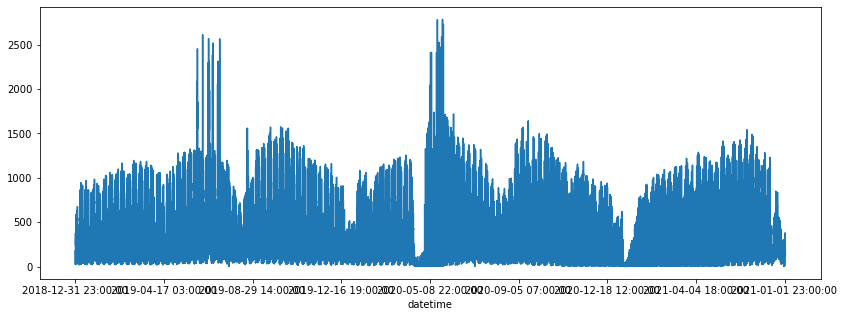

In [21]:
fig, ax = plt.subplots(figsize=(14, 5))

rides_per_hour['rides'].plot(ax=ax)
plt.show()

In [22]:
rides_time = rides_per_hour.copy()

We are going to zoom in the plot to understand better the pattern in time series

In [23]:
rides_zoom = rides_time[-720:]
rides_zoom

,date,weekday,hour,time,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week
datetime,,,,,,,,,,,,,
2021-06-19 00:00:00,2021-06-19,Saturday,0,00:00:00,6,0,212,19,2021,1,1,194.0,533.398810
2021-06-19 01:00:00,2021-06-19,Saturday,1,01:00:00,6,0,112,19,2021,1,1,144.0,533.208333
2021-06-19 02:00:00,2021-06-19,Saturday,2,02:00:00,6,0,120,19,2021,1,1,88.0,533.398810
2021-06-19 03:00:00,2021-06-19,Saturday,3,03:00:00,6,0,81,19,2021,1,1,70.0,533.464286
2021-06-19 04:00:00,2021-06-19,Saturday,4,04:00:00,6,0,74,19,2021,1,1,65.0,533.517857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06,Wednesday,19,19:00:00,1,1,277,6,2021,0,4,403.0,174.910714
2021-01-06 20:00:00,2021-01-06,Wednesday,20,20:00:00,1,1,219,6,2021,0,4,398.0,173.845238
2021-01-06 21:00:00,2021-01-06,Wednesday,21,21:00:00,1,1,191,6,2021,0,4,274.0,173.351190


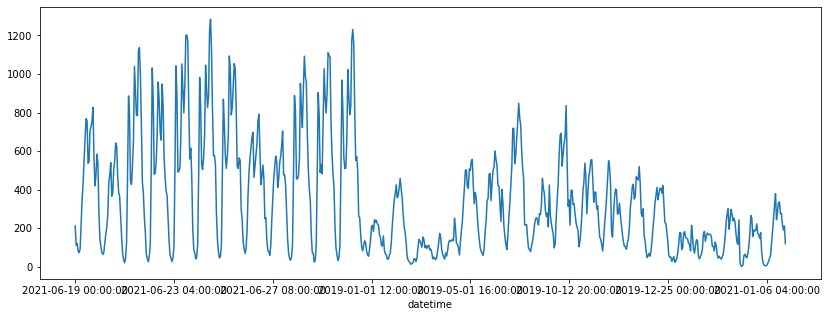

In [24]:
#plotting the last month data
fig, ax = plt.subplots(figsize=(14, 5))

rides_zoom['rides'].plot(ax=ax)
plt.show()

In [25]:
rides_zoom = rides_time[-360:]


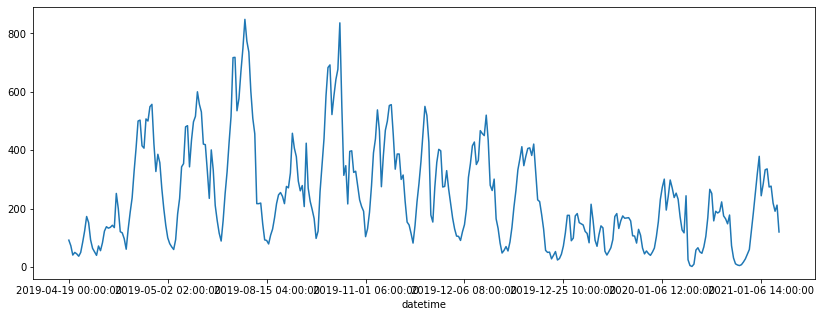

In [26]:
#plotting the last 15 days data
fig, ax = plt.subplots(figsize=(14, 5))

rides_zoom['rides'].plot(ax=ax)
plt.show()

In [42]:
#Rolling statistics
rides_per_hour_1= rides_per_hour[rides_per_hour['year']==2021]
rides_per_hour_1 = rides_per_hour_1['rides']
rides_per_hour_1 = pd.DataFrame(rides_per_hour_1)

In [46]:
rolmean

,rides
datetime,
2021-01-02 00:00:00,NaN
2021-01-02 01:00:00,NaN
2021-01-02 02:00:00,NaN
2021-01-02 03:00:00,NaN
2021-01-02 04:00:00,NaN
...,...
2021-01-06 19:00:00,414.827381
2021-01-06 20:00:00,413.023810
2021-01-06 21:00:00,411.125000


In [61]:
rolmean=rides_per_hour_1.rolling(window=24*7).mean() #weekly
rolstd=rides_per_hour_1.rolling(window=24*7).std()

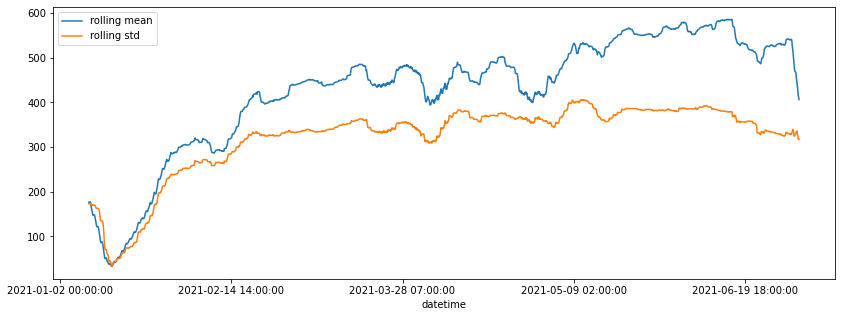

In [62]:
fig, ax = plt.subplots(figsize=(14, 5))
rolmean['rides'].plot(ax=ax, label = 'rolling mean')
rolstd['rides'].plot(ax=ax, label = 'rolling std')
plt.legend()
plt.show()

From the plot above we see that the rolling mean and standard deviation have approximately the same trend. Before applying our models we need to ensure that both of them remain time invariant over time. 

Another way to test this is by using the ADCF test (adfuller test)

In [52]:
from statsmodels.tsa.stattools import adfuller

In [55]:
df_test=adfuller(rides_per_hour_1, autolag='AIC')
df_test_results = pd.Series(df_test[0:4], index = ['Test statistic', 'p-value', 'Number of lags', 'Number observations'])
for key,value in df_test[4].items():
    df_test_results['Critical value (%s)' %key]=value

In [57]:
#Results of Dickey-Fuller test
df_test_results

Test statistic            -4.483726
p-value                    0.000210
Number of lags            29.000000
Number observations     4288.000000
Critical value (1%)       -3.431876
Critical value (5%)       -2.862214
Critical value (10%)      -2.567129
dtype: float64

For a time series to be stationary, the test results need to be:
1.  p - value is low (according to null hypotesis) - p-value is the probability that null hypotesis will not be rejected
2. The critical values should be as close as possible to the test statistics

In our case the p-value is low, this means that there ir a 0.021% of probability that our series is not stationary. \
On the other hand, the test statistic (-4.48 < -3.43, -2.86,-2.56) is lower that our critical values, so we reject the null hypothesis and infer that the time series is stationary


Conclusions: we reject the null hypotesis and conclude that our **time series is stationary**

##### Data transformation to convert our data in stationary

Objective: remove trend component.

###### a. Logaritmic transformation

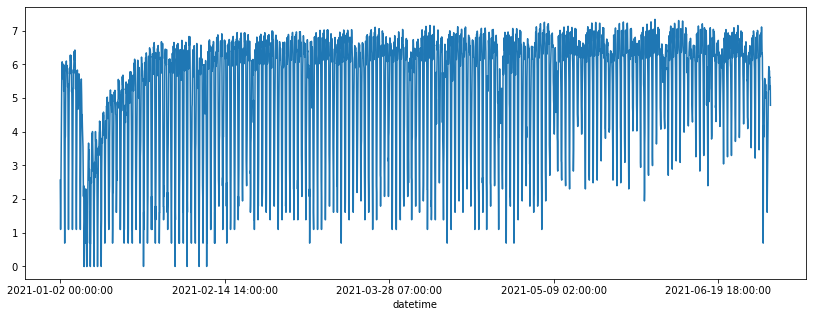

In [64]:
rides_per_hour_1_log = np.log(rides_per_hour_1)
fig, ax = plt.subplots(figsize=(14, 5))

rides_per_hour_1_log['rides'].plot(ax=ax)
plt.show()


In [65]:
rolmean=rides_per_hour_1_log.rolling(window=24*7).mean() #weekly
rolstd=rides_per_hour_1_log.rolling(window=24*7).std()

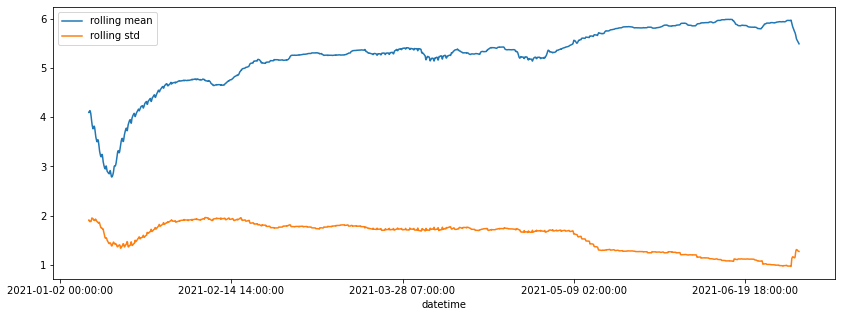

In [66]:
fig, ax = plt.subplots(figsize=(14, 5))
rolmean['rides'].plot(ax=ax, label = 'rolling mean')
rolstd['rides'].plot(ax=ax, label = 'rolling std')
plt.legend()
plt.show()

If we compare the result obtained in this curve with the previous one (without applying the transformation) we can see that we improved the stationarity of rolling mean and standard deviation

In [69]:
df_test=adfuller(rides_per_hour_1_log, autolag='AIC')
df_test_results = pd.Series(df_test[0:4], index = ['Test statistic', 'p-value', 'Number of lags', 'Number observations'])
for key,value in df_test[4].items():
    df_test_results['Critical value (%s)' %key]=value

In [70]:
df_test_results

Test statistic            -3.309676
p-value                    0.014451
Number of lags            30.000000
Number observations     4287.000000
Critical value (1%)       -3.431876
Critical value (5%)       -2.862214
Critical value (10%)      -2.567129
dtype: float64

From the results of the test we conclude that now our series is stationary:
1. Our p-value is lower than 0.05
2. The critcal values at 1%, 5% and 10% are close to test statistic

We improved stationarity

#### Decomposition

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
decomposition = seasonal_decompose(rides_per_hour_1_log, period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [115]:
trend.dropna(inplace=True)

In [113]:
residual.dropna(inplace=True)

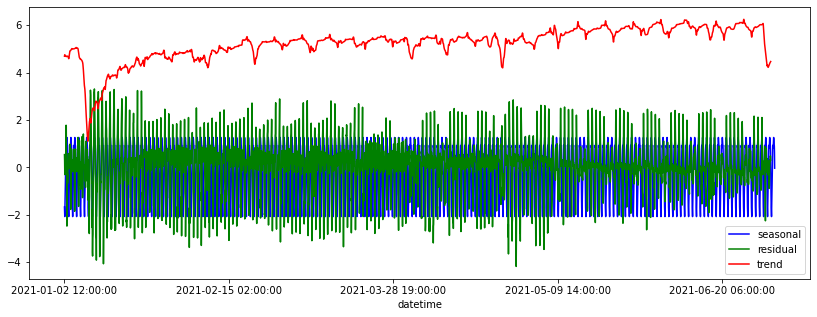

In [120]:
fig, ax = plt.subplots(figsize=(14, 5))
seasonal.plot(ax=ax, color='blue', label = 'seasonal')
residual.plot(ax=ax, color='green', label = 'residual')
trend.plot(ax=ax, color='red', label = 'trend')
plt.legend()
plt.show()


Now we are going to apply the dickey fuller test in our residual data

In [121]:
df_test=adfuller(residual, autolag='AIC')
df_test_results = pd.Series(df_test[0:4], index = ['Test statistic', 'p-value', 'Number of lags', 'Number observations'])
for key,value in df_test[4].items():
    df_test_results['Critical value (%s)' %key]=value

In [122]:
df_test_results

Test statistic           -20.676997
p-value                    0.000000
Number of lags            30.000000
Number observations     4263.000000
Critical value (1%)       -3.431885
Critical value (5%)       -2.862218
Critical value (10%)      -2.567131
dtype: float64

lag scatter plot: relationship between two variables, the value depends on the previous value (lag). To know if it's correct to use lag features (for the climate)

In [ ]:
#We use a lag plot to understand relation between demand same hour last week and demand
fig, ax = plt.subplots(figsize=(14, 5))

sns.scatterplot(x=rides_per_hour['rides_lag_7'], y=rides_per_hour['rides'])

Positive correlation between both of them

In [29]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

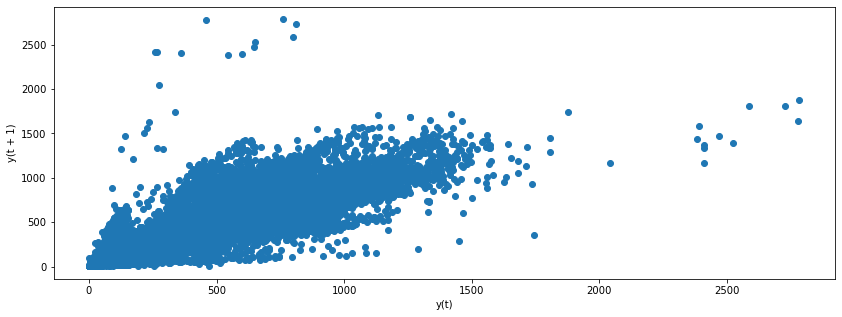

In [113]:
#Now we try to understand the correlation with lag of 24 hours
fig, ax = plt.subplots(figsize=(14, 5))
lag_plot(rides_per_hour['rides'])

##### Autocorrelation plot

In [114]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

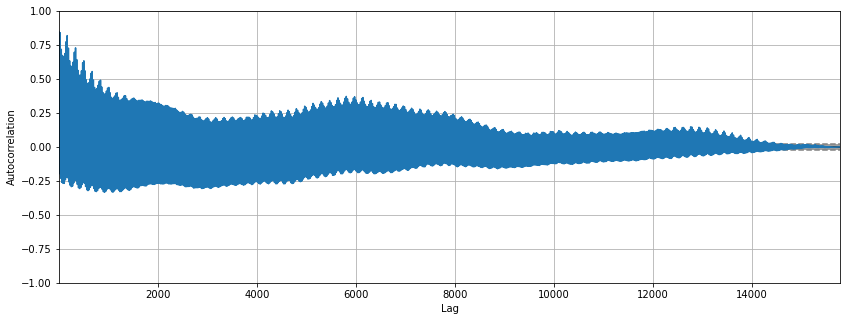

In [115]:
fig, ax = plt.subplots(figsize=(14, 5))

autocorrelation_plot(rides_per_hour['rides'])

Conclusions of the chart:
1. There is a high correlation for lag inferior to 500

# 2.3. Models: time series forecasting

- Moving Average Smoothening: for the climate average of the previous observations. Remove noise. Average of some values
- Simple exponential smoothing: weighted average (latest value is more important than the older ones)

These are used when there is no seasonality

- White noise: random numbers, we can not forecast. Error values should be white noise. If error have not white noise means that there is information which could have been model and our model don't take in into account. If it's white noise there is only left random fluctuations.

- Random walk: next value is the modification of the previous value in sequences

1. Additive model : time series = level + trend + seasonality + noise
2. Multiplicative model: time series = level*trend*seasonality*noise

#### Division in train and test

In [41]:
train_size = int(0.8 * rides_per_hour.shape[0])
train_size

12622

In [42]:
rides_train = rides_per_hour[0:train_size]
rides_test = rides_per_hour[train_size:]

In [43]:
rides_train.columns

Index(['date', 'weekday', 'hour', 'month', 'is_holiday', 'rides', 'day',
       'year', 'is_weekend', 'season', 'rides_lag_7', 'avg_week'],
      dtype='object')

## 2.3.1. Naive model

For our first model, we are going to assume that the last period number of rides is the forecast for this period. We have the column already created in our dataframe (rides_lag_7)

In [123]:
rides_per_hour['forecast'] = rides_per_hour['rides_lag_7']

In [124]:
rides_naive = rides_per_hour.dropna(subset=["rides_lag_7"])
rides_naive

,date,weekday,hour,time,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week,forecast
datetime,,,,,,,,,,,,,,
2019-01-09 23:00:00,2019-01-09,Wednesday,23,23:00:00,1,0,209,9,2019,0,4,176.0,313.083333,176.0
2019-01-10 00:00:00,2019-01-10,Thursday,0,00:00:00,1,0,107,10,2019,0,4,52.0,313.410714,52.0
2019-01-10 01:00:00,2019-01-10,Thursday,1,01:00:00,1,0,65,10,2019,0,4,29.0,313.625000,29.0
2019-01-10 02:00:00,2019-01-10,Thursday,2,02:00:00,1,0,36,10,2019,0,4,32.0,313.648810,32.0
2019-01-10 03:00:00,2019-01-10,Thursday,3,03:00:00,1,0,27,10,2019,0,4,23.0,313.672619,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00,2021-01-06,Wednesday,19,19:00:00,1,1,277,6,2021,0,4,403.0,174.910714,403.0
2021-01-06 20:00:00,2021-01-06,Wednesday,20,20:00:00,1,1,219,6,2021,0,4,398.0,173.845238,398.0
2021-01-06 21:00:00,2021-01-06,Wednesday,21,21:00:00,1,1,191,6,2021,0,4,274.0,173.351190,274.0


In [161]:
train_size = int(0.9 * rides_per_hour.shape[0])

In [126]:
rides_naive_train = rides_naive[0:train_size]
rides_naive_test = rides_naive[train_size:]

In [127]:
rides_naive_train.head()

,date,weekday,hour,time,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week,forecast
datetime,,,,,,,,,,,,,,
2019-01-09 23:00:00,2019-01-09,Wednesday,23,23:00:00,1,0,209,9,2019,0,4,176.0,313.083333,176.0
2019-01-10 00:00:00,2019-01-10,Thursday,0,00:00:00,1,0,107,10,2019,0,4,52.0,313.410714,52.0
2019-01-10 01:00:00,2019-01-10,Thursday,1,01:00:00,1,0,65,10,2019,0,4,29.0,313.625000,29.0
2019-01-10 02:00:00,2019-01-10,Thursday,2,02:00:00,1,0,36,10,2019,0,4,32.0,313.648810,32.0
2019-01-10 03:00:00,2019-01-10,Thursday,3,03:00:00,1,0,27,10,2019,0,4,23.0,313.672619,23.0


In [128]:
train_X, train_y = rides_naive_train['forecast'], rides_naive_train['rides']
test_X,test_y = rides_naive_test['forecast'], rides_naive_test['rides']

In [129]:
predictions = test_X
print(predictions)


datetime
2021-05-03 13:00:00     774.0
2021-05-03 14:00:00     636.0
2021-05-03 15:00:00     610.0
2021-05-03 16:00:00     977.0
2021-05-03 17:00:00    1047.0
                        ...  
2021-01-06 19:00:00     403.0
2021-01-06 20:00:00     398.0
2021-01-06 21:00:00     274.0
2021-01-06 22:00:00     276.0
2021-01-06 23:00:00     330.0
Name: forecast, Length: 1835, dtype: float64


In [130]:
demand = test_y
print(demand)

datetime
2021-05-03 13:00:00    471
2021-05-03 14:00:00    516
2021-05-03 15:00:00    683
2021-05-03 16:00:00    658
2021-05-03 17:00:00    688
                      ... 
2021-01-06 19:00:00    277
2021-01-06 20:00:00    219
2021-01-06 21:00:00    191
2021-01-06 22:00:00    212
2021-01-06 23:00:00    120
Name: rides, Length: 1835, dtype: int64


In [131]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(demand, predictions)
mse

36991.10190735695

In [132]:
#Metrics to evaluate models

In [133]:
from sklearn import metrics

In [134]:
#mean absolute percentage error
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [135]:
def calculate_metrics(fc,x_test):
    mse = metrics.mean_squared_error(fc,x_test)
    mae = metrics.mean_absolute_error(fc,x_test)
    rmse = np.sqrt(metrics.mean_squared_error(fc,x_test))
    #mape = mape(fc,x_test)
    r2 = metrics.r2_score(fc,x_test)
    return mse, mae, rmse, r2

In [136]:
evaluation_models = pd.DataFrame(columns=["model", "MSE", "MAE", "RMSE", "MAPE", "R2"])
evaluation_models

,model,MSE,MAE,RMSE,MAPE,R2


In [137]:
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
mape = mape(demand, predictions)

In [138]:
evaluation_models = evaluation_models.append({'model':'naive', 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2':r2},
                                             ignore_index=True)
evaluation_models

,model,MSE,MAE,RMSE,MAPE,R2
0,naive,36991.101907,120.236512,192.33071,75.025319,0.719136


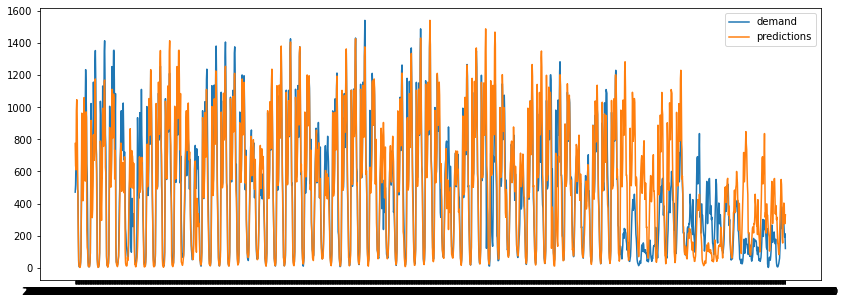

In [139]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

## 2.3.2. Auto regression forecasting model

#### ACF and PACF

In [141]:
from statsmodels.tsa.stattools import acf, pacf

In [142]:
lag_acf=acf(rides_per_hour_1_log, nlags=24)
lag_pacf=pacf(rides_per_hour_1_log, nlags=24, method='ols')

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


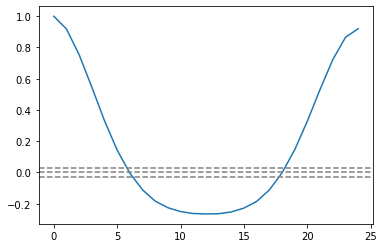

In [145]:
#Plotting acf
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rides_per_hour_1_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(rides_per_hour_1_log)), linestyle='--', color='gray')
plt.title(' Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

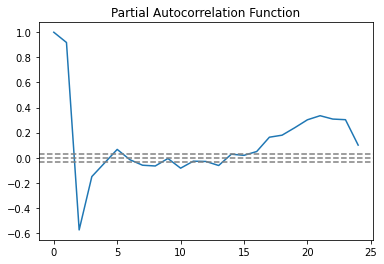

In [146]:
#Plotting pacf
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rides_per_hour_1_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(rides_per_hour_1_log)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

From the Autocorrelation graph we observe that the curve touches y = 0 at x=6, so **q=6**. \
From the Partial autocorrelation graph we observate that the curve touches the y = 0 line at x=2, so, **p=2**

We are going to use the autoregression model (kind of linear regresion model) to forecast the demand of bicicles. \
In order to apply this model we need to remove seasonality and trend. 

We can obtain our AR model by d=0 from ARIMA model.
For our AR model we use p =2


We are going to use as input variables the lag values

In [147]:
from statsmodels.tsa.arima_model import ARIMA

In [181]:
train_size = int(0.9 * rides_per_hour_1_log.shape[0])

In [182]:
rides_ar_train = rides_per_hour_1_log.rides[0:train_size]
rides_ar_test = rides_per_hour_1_log.rides[train_size:]

In [184]:
model = ARIMA(rides_ar_train, order=(2,1,0))
results_AR=model.fit()

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [172]:
results_AR.k_ar

2

In [173]:
results_AR.params

const            0.000228
ar.L1.D.rides    0.511512
ar.L2.D.rides   -0.001226
dtype: float64

In [191]:
predictions = results_AR.predict(start = len(rides_ar_train), end= len(rides_ar_train)+ len (rides_ar_test)-1)
predictions

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


3885   -0.228296
3886   -0.120331
3887   -0.063291
3888   -0.033206
3889   -0.017336
          ...   
4312    0.000380
4313    0.000380
4314    0.000380
4315    0.000380
4316    0.000380
Length: 432, dtype: float64

In [190]:
demand =rides_ar_test
demand

datetime
2021-06-15 00:00:00    4.077537
2021-06-15 01:00:00    3.401197
2021-06-15 02:00:00    2.833213
2021-06-15 03:00:00    3.713572
2021-06-15 04:00:00    4.820282
                         ...   
2021-01-06 19:00:00    5.624018
2021-01-06 20:00:00    5.389072
2021-01-06 21:00:00    5.252273
2021-01-06 22:00:00    5.356586
2021-01-06 23:00:00    4.787492
Name: rides, Length: 432, dtype: float64

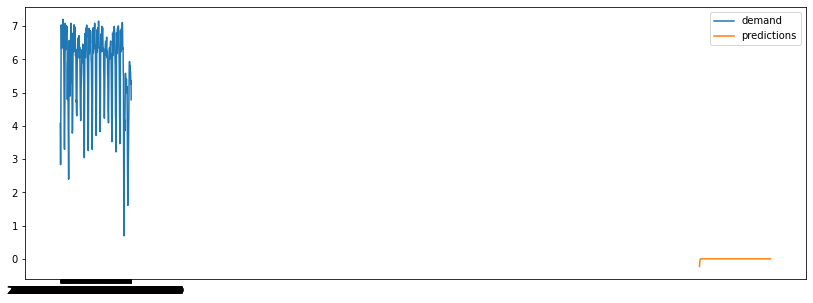

In [192]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [121]:
from statsmodels.tsa.ar_model import AR

#######################################################################################################################3

In [133]:
rides_per_hour_ar = rides_per_hour.reset_index()
rides_per_hour_ar

,datetime,date,weekday,hour,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week
0,2019-07-01 00:00:00+00:00,2019-07-01,Monday,0,7,0,140,1,2019,0,2,NaN,NaN
1,2019-07-01 01:00:00+00:00,2019-07-01,Monday,1,7,0,78,1,2019,0,2,NaN,NaN
2,2019-07-01 02:00:00+00:00,2019-07-01,Monday,2,7,0,51,1,2019,0,2,NaN,NaN
3,2019-07-01 03:00:00+00:00,2019-07-01,Monday,3,7,0,63,1,2019,0,2,NaN,NaN
4,2019-07-01 04:00:00+00:00,2019-07-01,Monday,4,7,0,124,1,2019,0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15773,2021-01-06 19:00:00+00:00,2021-01-06,Wednesday,19,1,1,277,6,2021,0,4,403.0,174.910714
15774,2021-01-06 20:00:00+00:00,2021-01-06,Wednesday,20,1,1,219,6,2021,0,4,398.0,173.845238
15775,2021-01-06 21:00:00+00:00,2021-01-06,Wednesday,21,1,1,191,6,2021,0,4,274.0,173.351190
15776,2021-01-06 22:00:00+00:00,2021-01-06,Wednesday,22,1,1,212,6,2021,0,4,276.0,172.970238


In [134]:
rides_ar_train = rides_per_hour_ar.rides[0:train_size]
rides_ar_test = rides_per_hour_ar.rides[train_size:]

In [135]:
model = AR(rides_ar_train)
model_fit = model.fit()

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [136]:
#No of lag variables that are important in our model
model_fit.k_ar

41

We are considering 29 lag variables for our model

In [137]:
#Coeficient of these lag variables
model_fit.params

const        21.389292
L1.rides      1.002417
L2.rides     -0.386168
L3.rides      0.103770
L4.rides     -0.020246
L5.rides      0.012743
L6.rides      0.111123
L7.rides     -0.047893
L8.rides     -0.078802
L9.rides      0.062659
L10.rides     0.062931
L11.rides     0.001626
L12.rides    -0.028581
L13.rides     0.000906
L14.rides     0.022589
L15.rides    -0.032182
L16.rides    -0.026553
L17.rides    -0.033805
L18.rides     0.027556
L19.rides     0.005279
L20.rides     0.012530
L21.rides    -0.012729
L22.rides     0.014879
L23.rides     0.034842
L24.rides     0.676253
L25.rides    -0.679952
L26.rides     0.265493
L27.rides    -0.078929
L28.rides     0.036854
L29.rides    -0.017817
L30.rides    -0.071795
L31.rides     0.000325
L32.rides     0.051078
L33.rides    -0.036542
L34.rides    -0.072167
L35.rides     0.013975
L36.rides     0.027093
L37.rides    -0.024735
L38.rides    -0.012003
L39.rides     0.043072
L40.rides    -0.020413
L41.rides     0.040483
dtype: float64

In [176]:
len(rides_ar_train)+ len (rides_ar_test)-1

4317

In [138]:
predictions = model_fit.predict(start = len(rides_ar_train), end = len(rides_ar_train)+ len (rides_ar_test)-1)

In [139]:
predictions

14200    948.389750
14201    873.872277
14202    577.003576
14203    547.185844
14204    555.684300
            ...    
15773    424.092354
15774    420.801638
15775    417.523121
15776    414.479658
15777    411.876965
Length: 1578, dtype: float64

In [140]:
demand = rides_ar_test
demand

14200    1006
14201     890
14202     553
14203     566
14204     557
         ... 
15773     277
15774     219
15775     191
15776     212
15777     120
Name: rides, Length: 1578, dtype: int64

In [141]:
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)

In [142]:
evaluation_models = evaluation_models.append({'model':'auto regression', 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2':r2}, ignore_index=True)

In [143]:
evaluation_models

,model,MSE,MAE,RMSE,MAPE,R2
0,naive,35892.907092,110.887234,189.454235,72.57603,0.727413
1,auto regression,97234.479306,245.879183,311.824437,NaN,-3.989392
2,auto regression,97234.479306,245.879183,311.824437,NaN,-3.989392


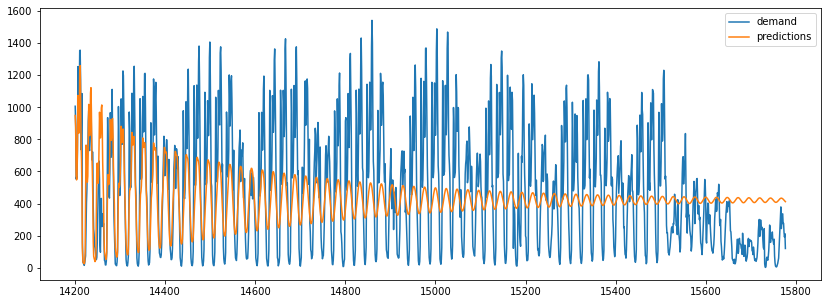

In [144]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

This model is adjunsting well for short term predictions

## 2.3.3. Moving average model (ARMA)

Forecast residual: should be white noise. Try to extract information from the residual.
1. Build a forecasting model (AR)
2. Find residual /forecast errors
3. Build a forecasting model on residuals
4. Update the initial forecast with forecasted residuals

We need to remove trend and seasonality

In [145]:
rides_per_hour_ar

,datetime,date,weekday,hour,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week
0,2019-07-01 00:00:00+00:00,2019-07-01,Monday,0,7,0,140,1,2019,0,2,NaN,NaN
1,2019-07-01 01:00:00+00:00,2019-07-01,Monday,1,7,0,78,1,2019,0,2,NaN,NaN
2,2019-07-01 02:00:00+00:00,2019-07-01,Monday,2,7,0,51,1,2019,0,2,NaN,NaN
3,2019-07-01 03:00:00+00:00,2019-07-01,Monday,3,7,0,63,1,2019,0,2,NaN,NaN
4,2019-07-01 04:00:00+00:00,2019-07-01,Monday,4,7,0,124,1,2019,0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15773,2021-01-06 19:00:00+00:00,2021-01-06,Wednesday,19,1,1,277,6,2021,0,4,403.0,174.910714
15774,2021-01-06 20:00:00+00:00,2021-01-06,Wednesday,20,1,1,219,6,2021,0,4,398.0,173.845238
15775,2021-01-06 21:00:00+00:00,2021-01-06,Wednesday,21,1,1,191,6,2021,0,4,274.0,173.351190
15776,2021-01-06 22:00:00+00:00,2021-01-06,Wednesday,22,1,1,212,6,2021,0,4,276.0,172.970238


First we implement the naive model

In [149]:
rides_per_hour['forecast'] = rides_per_hour['rides_lag_7']
rides_per_hour['residuals'] = rides_per_hour['rides'] - rides_per_hour['rides_lag_7']
rides_per_hour

,date,weekday,hour,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week,forecast,residuals
datetime,,,,,,,,,,,,,,
2019-07-01 00:00:00+00:00,2019-07-01,Monday,0,7,0,140,1,2019,0,2,NaN,NaN,NaN,NaN
2019-07-01 01:00:00+00:00,2019-07-01,Monday,1,7,0,78,1,2019,0,2,NaN,NaN,NaN,NaN
2019-07-01 02:00:00+00:00,2019-07-01,Monday,2,7,0,51,1,2019,0,2,NaN,NaN,NaN,NaN
2019-07-01 03:00:00+00:00,2019-07-01,Monday,3,7,0,63,1,2019,0,2,NaN,NaN,NaN,NaN
2019-07-01 04:00:00+00:00,2019-07-01,Monday,4,7,0,124,1,2019,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 19:00:00+00:00,2021-01-06,Wednesday,19,1,1,277,6,2021,0,4,403.0,174.910714,403.0,-126.0
2021-01-06 20:00:00+00:00,2021-01-06,Wednesday,20,1,1,219,6,2021,0,4,398.0,173.845238,398.0,-179.0
2021-01-06 21:00:00+00:00,2021-01-06,Wednesday,21,1,1,191,6,2021,0,4,274.0,173.351190,274.0,-83.0


In [158]:
rides_arma = rides_per_hour.dropna(subset=["rides_lag_7"])
rides_arma = rides_arma.reset_index()
rides_arma

,datetime,date,weekday,hour,month,is_holiday,rides,day,year,is_weekend,season,rides_lag_7,avg_week,forecast,residuals
0,2019-07-08 00:00:00+00:00,2019-07-08,Monday,0,7,0,135,8,2019,0,2,140.0,509.291667,140.0,-5.0
1,2019-07-08 01:00:00+00:00,2019-07-08,Monday,1,7,0,71,8,2019,0,2,78.0,509.250000,78.0,-7.0
2,2019-07-08 02:00:00+00:00,2019-07-08,Monday,2,7,0,57,8,2019,0,2,51.0,509.285714,51.0,6.0
3,2019-07-08 03:00:00+00:00,2019-07-08,Monday,3,7,0,53,8,2019,0,2,63.0,509.226190,63.0,-10.0
4,2019-07-08 04:00:00+00:00,2019-07-08,Monday,4,7,0,114,8,2019,0,2,124.0,509.166667,124.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15605,2021-01-06 19:00:00+00:00,2021-01-06,Wednesday,19,1,1,277,6,2021,0,4,403.0,174.910714,403.0,-126.0
15606,2021-01-06 20:00:00+00:00,2021-01-06,Wednesday,20,1,1,219,6,2021,0,4,398.0,173.845238,398.0,-179.0
15607,2021-01-06 21:00:00+00:00,2021-01-06,Wednesday,21,1,1,191,6,2021,0,4,274.0,173.351190,274.0,-83.0
15608,2021-01-06 22:00:00+00:00,2021-01-06,Wednesday,22,1,1,212,6,2021,0,4,276.0,172.970238,276.0,-64.0


In [159]:
train_res = rides_arma[0:train_size]
test_res = rides_arma[train_size:]

In [166]:
train= train_res['residuals']
test= test_res['residuals']

In [168]:
train

0        -5.0
1        -7.0
2         6.0
3       -10.0
4       -10.0
         ... 
14195    10.0
14196     9.0
14197     3.0
14198    -3.0
14199   -93.0
Name: residuals, Length: 14200, dtype: float64

In [169]:
from statsmodels.tsa.ar_model import AR

In [171]:
model = AR(train)
model_fit = model.fit()

In [172]:
#How many lag variables are important
model_fit.k_ar

41

In [173]:
model_fit.params

const            0.009939
L1.residuals     0.836822
L2.residuals    -0.167008
L3.residuals     0.014671
L4.residuals     0.048076
L5.residuals     0.003162
L6.residuals     0.090348
L7.residuals    -0.037650
L8.residuals    -0.040856
L9.residuals     0.023269
L10.residuals    0.024962
L11.residuals    0.027207
L12.residuals   -0.021805
L13.residuals   -0.003650
L14.residuals   -0.002750
L15.residuals   -0.013108
L16.residuals   -0.010553
L17.residuals   -0.019862
L18.residuals    0.025731
L19.residuals   -0.004184
L20.residuals    0.021853
L21.residuals   -0.020617
L22.residuals    0.012851
L23.residuals   -0.004636
L24.residuals    0.485348
L25.residuals   -0.438715
L26.residuals    0.109878
L27.residuals   -0.041229
L28.residuals    0.010429
L29.residuals    0.010306
L30.residuals   -0.046575
L31.residuals    0.006287
L32.residuals    0.023289
L33.residuals   -0.016013
L34.residuals   -0.012934
L35.residuals    0.002468
L36.residuals    0.011638
L37.residuals   -0.000338
L38.residual

In [176]:
predictions_residual = model_fit.predict(start = len(train), end = len(train)+ len (test)-1 )
predictions_residual

14200   -77.368698
14201   -81.131076
14202   -26.345878
14203   -15.995147
14204     9.543625
           ...    
15605     0.095661
15606     0.095661
15607     0.095661
15608     0.095661
15609     0.095661
Length: 1410, dtype: float64

In [179]:
predictions = test_res['forecast'] + predictions_residual
predictions

14200    928.631302
14201    808.868924
14202    526.654122
14203    550.004853
14204    566.543625
            ...    
15605    403.095661
15606    398.095661
15607    274.095661
15608    276.095661
15609    330.095661
Length: 1410, dtype: float64

In [181]:
demand = test_res['rides']
demand

14200    903
14201    767
14202    568
14203    532
14204    599
        ... 
15605    277
15606    219
15607    191
15608    212
15609    120
Name: rides, Length: 1410, dtype: int64

In [183]:
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)

In [184]:
evaluation_models = evaluation_models.append({'model':'ARMA', 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2':r2}, ignore_index=True)

In [185]:
evaluation_models

,model,MSE,MAE,RMSE,MAPE,R2
0,naive,35892.907092,110.887234,189.454235,72.57603,0.727413
1,auto regression,97234.479306,245.879183,311.824437,NaN,-3.989392
2,auto regression,97234.479306,245.879183,311.824437,NaN,-3.989392
3,ARMA,35644.367258,110.283935,188.797159,NaN,0.727689


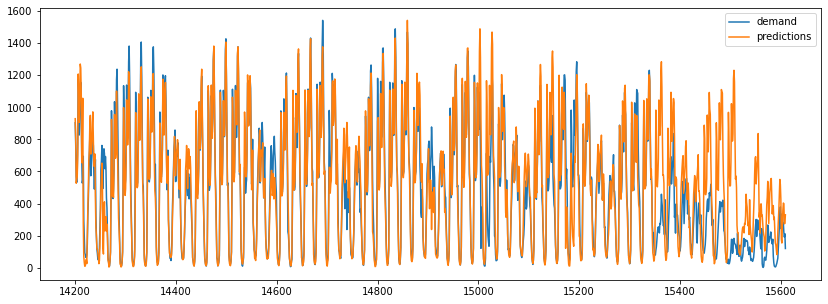

In [186]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

## 2.3.4. ARIMA Model

We are going to use an ARIMA (AutoRegressive Integrated Moving Average) model to predict the demand of bicimad based on historical observations. 

In order to evaluate if it is possible to apply an ARIMA model, we need to ensure that our data is stationary ( the mean, the variance, and the covariance) not depend on time.

As we can see in the plot below our data satifies these conditions

ARIMA deals with trends but not with seasonality

In order to apply our model, we are going to follow the following steps:
1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

#### Autocorrelation 

Measured by Pearsons Correlation coefficient (between -1 and 1). \
X is a lagged value of y: autocorrelation (only one variable)

In [187]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

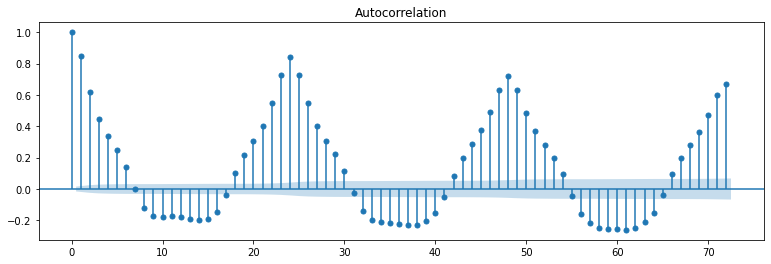

In [191]:
#Autocorrelation plot
fig, ax = plt.subplots(figsize=(13, 4))
plot_acf(rides_per_hour['rides'], ax=ax, lags=72)
plt.show()

Lag values on x \
Correlation coefficient in y \
The color is the 95% confidence interval, ouside this there is correlation

In [192]:
#Partial autocorrelation: to remove the impact of lag 1 series on the rest of them

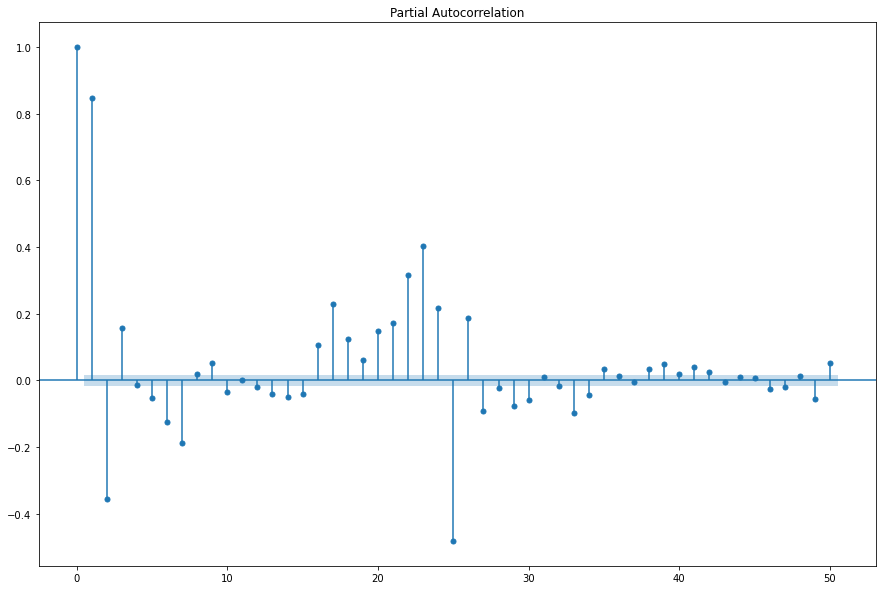

In [207]:
#Partial autocorrelation

fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(rides_per_hour['rides'], ax=ax, lags=50, method='ywm')
plt.show()

This tells us information on how many lag values we should be using. \
When the value goes below the 95 % confidence interval thaat is the point when we are going to use the lag value

El estudio de autocorrelación muestra indicios de que, conocer el número de usuarios en las horas previas, así como los días anteriores a la misma hora, puede resultar util para predecir el número de usuarios.



In [62]:
#library statsmodel used for the model

from statsmodels.tsa.arima_model import ARIMA

To deal with seasonality we use the ARIMA model with differenciating:
1. Use differencing to remove trend
2. Use AR to forecast
3. Use MA on residuals to update forecast
4. Add trend and seasonality to get final forecast

Parameters:
- **p**: order of autorregresion (number of lag variables)
- **d**: order of integration (Number of differenciating needed, to remove trend)
- **q**: order of moving average(window size for moving average, size of residuals, to forecast future residuals)

<AxesSubplot:xlabel='datetime'>

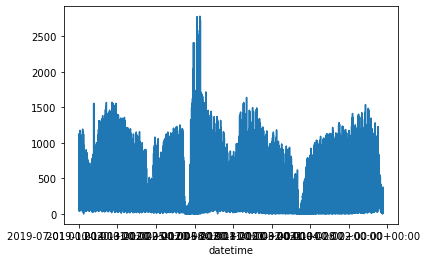

In [196]:
rides_per_hour['rides'].plot()

In [197]:
#We don't see any trend
d=0

In [204]:
autocorrelation_plot?

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

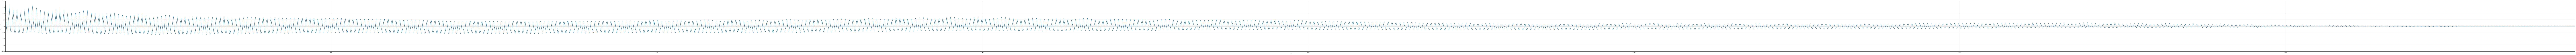

In [203]:
fig, ax = plt.subplots(figsize=(500, 10))
autocorrelation_plot(rides_per_hour['rides'])

In [206]:
#Autocorrelation plot: we choose the value where the line is crossing the confident interval 
#p=?

In [208]:
#Partial autocorrelation
q=3

In [210]:
from statsmodels.tsa.arima_model import ARIMA

In [213]:
model=ARIMA(rides_per_hour['rides'], order=(24,0,3))
model_fit=model.fit()

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [214]:
#We see all coefficients
model_fit.summary()
#smaller the p-value more important the variable is

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  rides   No. Observations:                15778
Model:                    ARMA(24, 3)   Log Likelihood              -96745.742
Method:                       css-mle   S.D. of innovations            111.288
Date:                Fri, 15 Apr 2022   AIC                         193549.485
Time:                        12:08:54   BIC                         193771.810
Sample:                             0   HQIC                        193623.067
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          428.1541     23.967     17.864      0.000     381.179     475.129
ar.L1.rides      0.0332      0.009      3.848      0.000       0.016       0.050
ar.L2.rides      0.0397      0.008      4.826      0.000       0.024       0.056
ar.L3.rides      0.0350      0.008      4.434      0.000       0.020       0.051
ar.L4.rides      0.0502      0.008      6.193      0.000       0.034       0.066
ar.L5.rides     -0.0191      0.006     -3.037      0.002      -0.031      -0.007
ar.L6.rides      0.0705      0.006     12.057      0.000       0.059       0.082
ar.L7.rides     -0.0028      0.006     -0.485      0.628      -0.014       0.009
ar.L8.rides     -0.0759      0.006    -12.976      0.000      -0.087      -0.064
ar.L9.rides     -0.0243      0.006     -4.051      0.000      -0.036      -0.013
ar.L10.rides     0.0161      0.006      2.683      0.007       0.004       0.028
ar.L11.rides     0.0329      0.006      5.612      0.000       0.021       0.044
ar.L12.rides     0.0124      0.006      2.112      0.035       0.001       0.024
ar.L13.rides    -0.0167      0.006     -2.859      0.004      -0.028      -0.005
ar.L14.rides    -0.0020      0.006     -0.338      0.735      -0.013       0.009
ar.L15.rides    -0.0019      0.006     -0.324      0.746      -0.013       0.010
ar.L16.rides    -0.0429      0.006     -7.376      0.000      -0.054      -0.032
ar.L17.rides    -0.0373      0.006     -6.331      0.000      -0.049      -0.026
ar.L18.rides     0.0166      0.006      2.825      0.005       0.005       0.028
ar.L19.rides     0.0313      0.006      5.296      0.000       0.020       0.043
ar.L20.rides     0.0345      0.006      5.882      0.000       0.023       0.046
ar.L21.rides     0.0060      0.006      1.040      0.298      -0.005       0.017
ar.L22.rides     0.0117      0.006      2.019      0.044       0.000       0.023
ar.L23.rides     0.0438      0.006      7.536      0.000       0.032       0.055
ar.L24.rides     0.6894      0.006    118.809      0.000       0.678       0.701
ma.L1.rides      0.9849      0.012     83.337      0.000       0.962       1.008
ma.L2.rides      0.5384      0.013     43.063      0.000       0.514       0.563
ma.L3.rides      0.2008      0.011     17.481      0.000       0.178       0.223
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0051           -0.0000j            1.0051           -0.0000
AR.2             0.9702           -0.2570j            1.0036           -0.0412
AR.3             0.9702           +0.2570j            1.0036            0.0412
AR.4             0.8760           -0.5057j            1.0115           -0.0833
AR.5             0.8760           +0.5057j            1.0115            0.0833
AR.6             0.

In [215]:
model_result = model_fit.forecast()
model_result #forecast, std deviation and confidence interval

(array([78.24928725]),
 array([111.28843985]),
 array([[-139.87204675,  296.37062125]]))

<AxesSubplot:xlabel='datetime'>

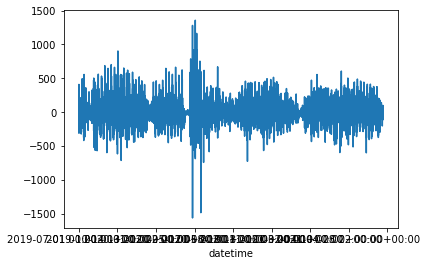

In [217]:
residuals = model_fit.resid


<AxesSubplot:xlabel='datetime'>

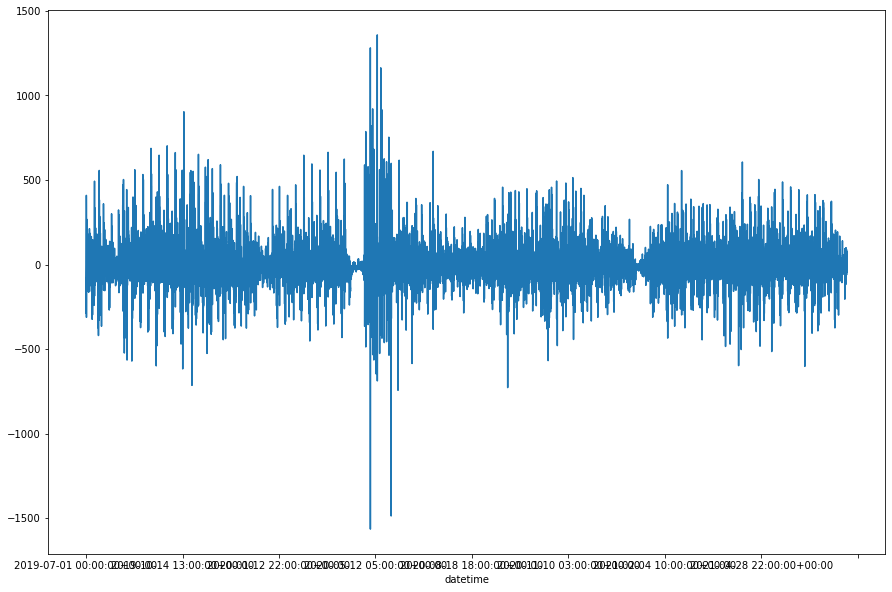

In [218]:
fig, ax = plt.subplots(figsize=(15, 10))
residuals.plot()

In [219]:
residuals.describe()

count    15778.000000
mean        -0.132446
std        111.413643
min      -1565.148418
25%        -42.613145
50%         -8.049735
75%         38.796050
max       1358.163790
dtype: float64

In [140]:
## ARIMA MODEL

# OLD

To parametrize the model we need three parameters:
- p: number of autoregressive terms
- d: number of nonseasonal differences
- q: number of moving-average terms

First we are going to analyze the autocorrelation plot

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [194]:
movements_arima = movements_by_hour[['date', '_id']]
movements_arima

,date,_id
0,2021-01-01,244
1,2021-01-01,25
2,2021-01-01,5
3,2021-01-01,2
4,2021-01-01,10
...,...,...
4313,2021-06-30,813
4314,2021-06-30,552
4315,2021-06-30,571
4316,2021-06-30,499


#### Obtaining the p

Autocorrelacion parcial

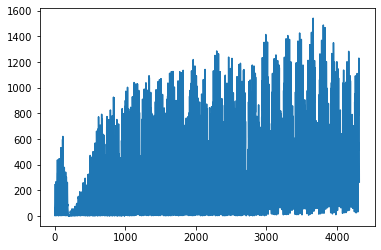

In [197]:
plt.plot(movements_arima._id)

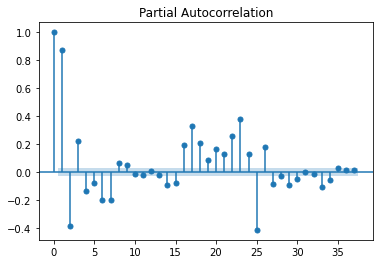

In [201]:
plot_pacf(movements_arima._id)
plt.show()

Vamos a escoger el orden del término AR teniendo en cuenta el corte con el limite de significancia (área azul sombreada) del gráfico pacf, como mínimo tiene que ser uno.
**p = 1**

#### Obtaining q

Autocorrelacion parcial siemple

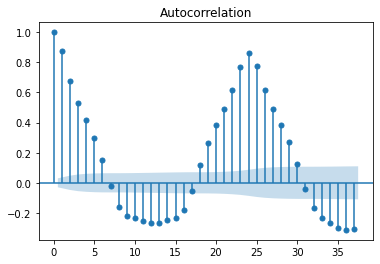

In [200]:
plot_acf(movements_arima._id)
plt.show()

Me quiero quedar con las partes que estan por encima del área sombreado de azul

**q=1**

##### Constructing ARIMA model

In [202]:
from statsmodels.tsa.arima_model import ARIMA

#firt approach d=0 p=1,q=1
arima_model = ARIMA(movements_arima._id, order=(1,0,1))
arima_model_fit = arima_model.fit(disp=0)
arima_model_fit.summary()

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    _id   No. Observations:                 4318
Model:                     ARMA(1, 1)   Log Likelihood              -27847.125
Method:                       css-mle   S.D. of innovations            152.920
Date:                Sat, 02 Apr 2022   AIC                          55702.249
Time:                        20:06:22   BIC                          55727.731
Sample:                             0   HQIC                         55711.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.9986     16.105     26.203      0.000     390.434     453.563
ar.L1._id      0.7789      0.010     76.552      0.000       0.759       0.799
ma.L1._id      0.5312      0.013     41.594      0.000       0.506       0.556
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2838           +0.0000j            1.2838            0.0000
MA.1           -1.8824           +0.0000j            1.8824            0.5000
-----------------------------------------------------------------------------
"""

In [203]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(arima_model_fit.resid, lags=[10],return_df=True)

,lb_stat,lb_pvalue
10,389.50012,1.613572e-77


Como el p_valor es menor que 0.5 el valor no se ajusta bien.

In [204]:
#We iterate with different values por the parameters
p=6
d=0
q=4

from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(movements_arima._id, order=(p,d,q))
arima_model_fit = arima_model.fit(disp=0)
arima_model_fit.summary()
sm.stats.acorr_ljungbox(arima_model_fit.resid, lags=[10],return_df=True)

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


,lb_stat,lb_pvalue
10,167.688816,8.346137e-31


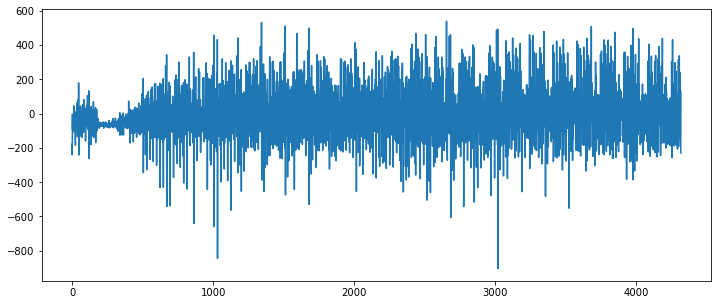

In [205]:
residuals=pd.DataFrame(arima_model_fit.resid)
plt.figure(figsize=(12,5))
plt.plot(residuals)

<Figure size 864x360 with 0 Axes>

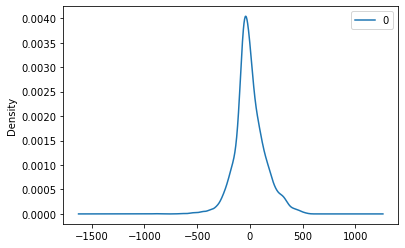

In [206]:
#distribucion
plt.figure(figsize=(12,5))
residuals.plot(kind='kde');

Los errores tienen una distribución normal con una media cercana a 0

Vamos a ver como se ajusta nuestro forecast a los datos

In [80]:
arima_model_fit.plot_predict?

<Figure size 1080x360 with 0 Axes>

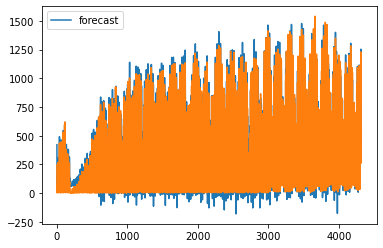

In [207]:
plt.figure(figsize=(15,5))
arima_model_fit.plot_predict(dynamic = False)
plt.show()

Se ajusta bien el forecast a la demanda real. No lo hemos utilizado para predecir el futuro.

Usamos la validación cruzada: busca obtener el valor futuro utilizando los datos existentes

In [95]:
#pip install pmdarima

In [208]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [209]:
X = movements_arima[["_id"]]
X

,_id
0,244
1,25
2,5
3,2
4,10
...,...
4313,813
4314,552
4315,571
4316,499


We split into train and test, we use all the data except the last five rows to train our model and the last 15 days to test the model

In [210]:
x_train, x_test = X[0:-15], X[-15:]

In [211]:
#parameters for the model
p=4
d=0
q=6
model = ARIMA(x_train, order=(p,d,q))
model_fit = model.fit(disp=-1)

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [212]:
#forecast
fc,se,conf=model_fit.forecast(15,alpha=0.05) #95% of confidence

In [213]:
fc_series=pd.Series(fc,x_test.index)
fc_series

4303    490.793345
4304    529.067213
4305    640.121110
4306    758.805289
4307    754.567647
4308    758.279064
4309    810.634048
4310    789.268358
4311    698.693496
4312    641.096118
4313    588.719582
4314    476.691551
4315    359.469722
4316    286.583606
4317    212.192238
dtype: float64

In [214]:
lower_series=pd.Series(conf[:,0], x_test.index)
lower_series

4303    220.925595
4304    119.047339
4305    194.557669
4306    308.328145
4307    303.626092
4308    307.292286
4309    356.406279
4310    332.058378
4311    241.376960
4312    183.509414
4313    129.757401
4314     17.649563
4315    -99.910500
4316   -172.847897
4317   -247.302126
dtype: float64

In [215]:
upper_series=pd.Series(conf[:,1],x_test.index)
upper_series

4303     760.661094
4304     939.087086
4305    1085.684551
4306    1209.282433
4307    1205.509201
4308    1209.265842
4309    1264.861817
4310    1246.478337
4311    1156.010031
4312    1098.682823
4313    1047.681764
4314     935.733539
4315     818.849944
4316     746.015110
4317     671.686602
dtype: float64

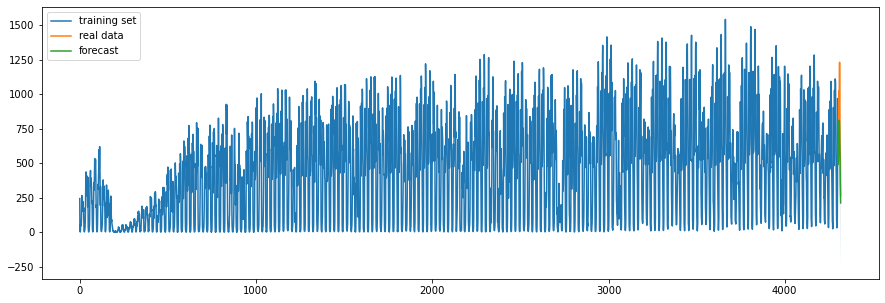

In [216]:
#Results of prediction
plt.figure(figsize=(15,5))
plt.plot(x_train, label='training set')
plt.plot(x_test, label = 'real data')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.legend()
plt.show()

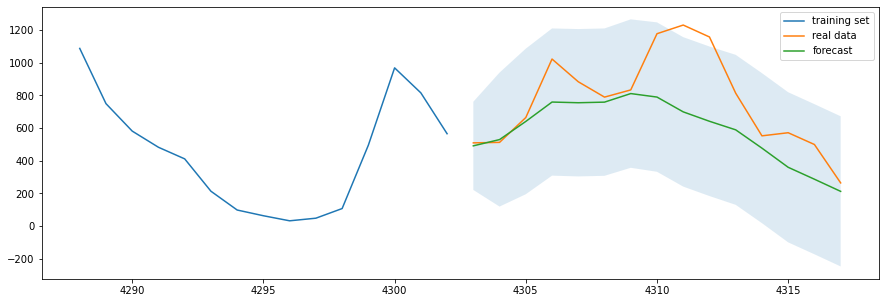

In [218]:
#Focusing on the forecast part
plt.figure(figsize=(15,5))
plt.plot(x_train[-15:], label='training set')
plt.plot(x_test, label = 'real data')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.legend()
plt.show()

Todo se encuentra dentro de la banda de confianza, aunque hay zonas que hemos pronosticado que estan por debajo de la demanda real

#### Metricas

In [219]:
from sklearn import metrics

In [223]:
evaluation_models.append({'model':'ARIMA', 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2':r2}, ignore_index=True)

,model,MSE,MAE,RMSE,MAPE,R2
0,ARIMA,26006.694617,107.233989,161.265913,<function mape at 0x000001FA4F378280>,0.27175


#### Autoarima

In [224]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

We construct the auto arima model, with test adf, to find the optimal d, we set the p and q betweet 1 and 5, the frequency as 1.
The auto arima model return the best model

In [225]:
auto_arima_model = pm.auto_arima(movements_arima._id, start_p=1,start_q=1,
                                test = 'adf', max_p=5, max_q=5,
                                m=1,d=None, seasonal = False, start_P=0,
                                D=0, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=55986.405, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66767.425, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=56813.068, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61908.789, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=55983.713, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=56304.622, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=55919.108, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=55943.284, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55906.189, Time=0.97 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55918.333, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55864.861, Time=2.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55919.284, Time=0.20 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=55709.480, Time=2.45 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=55860.281, Time=1.91 sec
 ARIMA(5,0,3)(0,0,0

In [226]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4318
Model:               SARIMAX(5, 0, 4)   Log Likelihood              -27616.652
Date:                Sat, 02 Apr 2022   AIC                          55255.305
Time:                        20:08:54   BIC                          55325.381
Sample:                             0   HQIC                         55280.049
                               - 4318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.7751     13.778      5.064      0.000      42.771      96.779
ar.L1          2.0715      0.176     11.763      0.000       1.726       2.417
ar.L2         -2.0218      0.381     -5.307      0.000      -2.769      -1.275
ar.L3          0.8068      0.427      1.888      0.059      -0.031       1.644
ar.L4          0.1860      0.253      0.736      0.462      -0.309       0.681
ar.L5         -0.1988      0.061     -3.237      0.001      -0.319      -0.078
ma.L1         -0.8230      0.178     -4.616      0.000      -1.173      -0.474
ma.L2          0.4039      0.161      2.508      0.012       0.088       0.720
ma.L3          0.4983      0.119      4.180      0.000       0.265       0.732
ma.L4         -0.1618      0.055     -2.961      0.003      -0.269      -0.055
sigma2      2.218e+04    413.631     53.621      0.000    2.14e+04     2.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               752.00
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

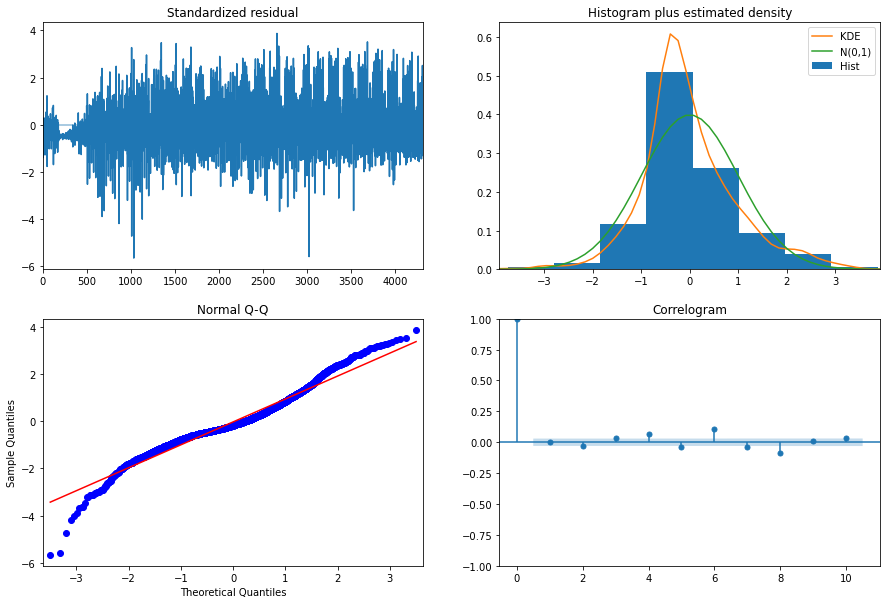

In [227]:
auto_arima_model.plot_diagnostics(figsize=(15,10))
plt.show()

1. First plot (standardized residual):the residual errors fluctuate around 0, uniformed variance
2. Second plot (histogram): Distribution with mean 0, the orange line is the density
3. Third plot (normal Q-Q): hay sesgo, para que no haya sesgo los puntos tienen que seguir la linea roja
4. Fouth plot (correlogram or ACF)

In [229]:
#Forecast
n_periods=24
forecast, confidence_interval = auto_arima_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_forecast = np.arange(len(movements_arima._id), len(movements_arima._id)+n_periods)

In [230]:
fc_series = pd.Series(forecast, index = index_of_forecast)
lower_series= pd.Series(confidence_interval[:,0], index = index_of_forecast)
upper_series = pd.Series(confidence_interval[:,1], index = index_of_forecast)

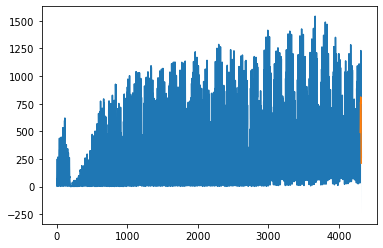

In [228]:
plt.plot(movements_arima._id)
plt.plot(fc_series)
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.show()

#### Arima part 2